In [1]:
import pandas as pd

# Read the CSV files
securities_df = pd.read_csv('securities.csv')
prices_df = pd.read_csv('prices.csv')

# Display the first few lines of each file to understand the structure and content
print("First few lines of securities.csv:")
print(securities_df.head())

print("\nFirst few lines of prices.csv:")
print(prices_df.head())

First few lines of securities.csv:
  Ticker symbol             Security SEC filings             GICS Sector  \
0           MMM           3M Company     reports             Industrials   
1           ABT  Abbott Laboratories     reports             Health Care   
2          ABBV               AbbVie     reports             Health Care   
3           ACN        Accenture plc     reports  Information Technology   
4          ATVI  Activision Blizzard     reports  Information Technology   

                GICS Sub Industry   Address of Headquarters Date first added  \
0        Industrial Conglomerates       St. Paul, Minnesota              NaN   
1           Health Care Equipment   North Chicago, Illinois       31-03-1964   
2                 Pharmaceuticals   North Chicago, Illinois       31-12-2012   
3  IT Consulting & Other Services           Dublin, Ireland       06-07-2011   
4     Home Entertainment Software  Santa Monica, California       31-08-2015   

       CIK  
0    66740  
1

In [3]:
# Convert the date column in prices_df to datetime format with mixed formats
prices_df['date'] = pd.to_datetime(prices_df['date'], format='mixed')

# Check for missing values in both datasets
missing_values_securities = securities_df.isnull().sum()
missing_values_prices = prices_df.isnull().sum()

print("Missing values in securities.csv:")
print(missing_values_securities)

print("\nMissing values in prices.csv:")
print(missing_values_prices)

# Merge the datasets on the ticker symbol
merged_df = pd.merge(prices_df, securities_df, left_on='symbol', right_on='Ticker symbol', how='left')

# Display the first few lines of the merged dataset
print("\nFirst few lines of the merged dataset:")
print(merged_df.head())

Missing values in securities.csv:
Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

Missing values in prices.csv:
date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

First few lines of the merged dataset:
        date symbol        open       close         low        high  \
0 2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1 2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2 2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3 2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4 2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume Ticker symbol              Security SEC filings GICS Sector  \
0  2163600.0          WLTW  Willis

C:\Users\gsans\AppData\Local\Temp\ipykernel_10660\1107637966.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  securities_df['Date first added'].fillna('1900-01-01', inplace=True)


Summary Statistics:
                                 date  symbol           open          close  \
count                          851264  851264  851264.000000  851264.000000   
unique                            NaN     501            NaN            NaN   
top                               NaN     KSU            NaN            NaN   
freq                              NaN    1762            NaN            NaN   
mean    2013-07-21 02:56:29.294037760     NaN      70.836986      70.857109   
min               2010-01-04 00:00:00     NaN       0.850000       0.860000   
25%               2011-10-19 00:00:00     NaN      33.840000      33.849998   
50%               2013-08-02 00:00:00     NaN      52.770000      52.799999   
75%               2015-04-24 00:00:00     NaN      79.879997      79.889999   
max               2016-12-30 00:00:00     NaN    1584.439941    1578.130005   
std                               NaN     NaN      83.695876      83.689686   

                  low          

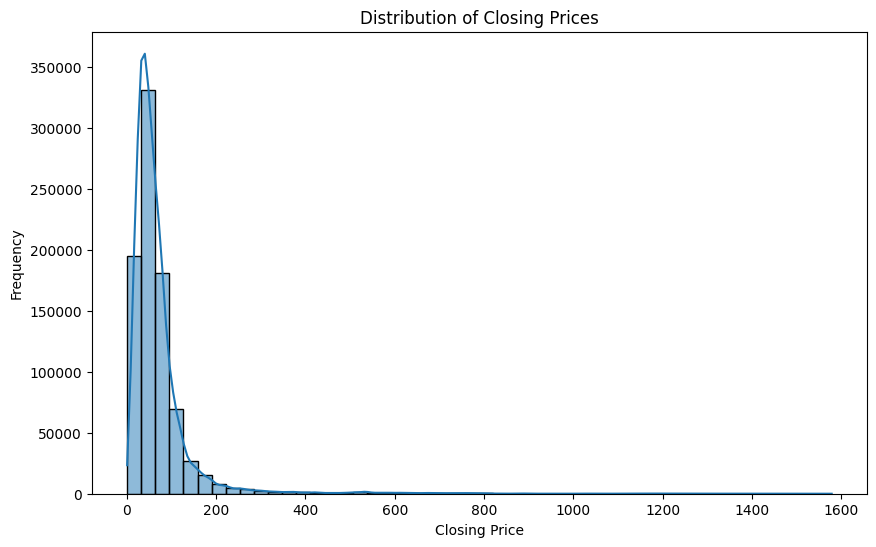

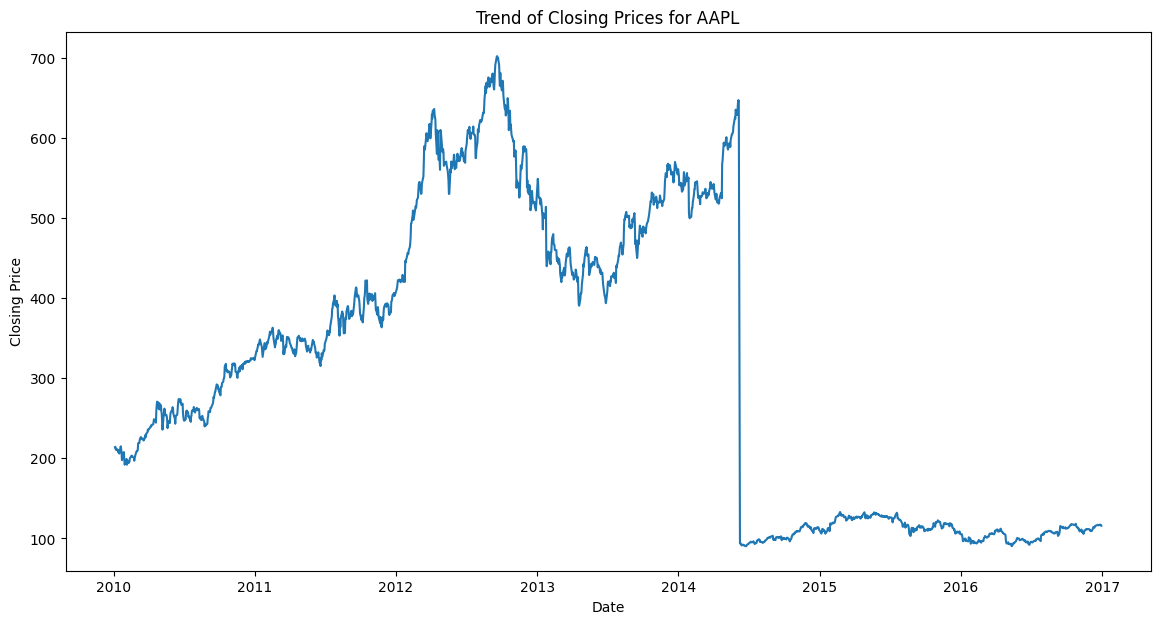

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values in the 'Date first added' column
# For simplicity, we can fill missing values with a placeholder date or drop the column if it's not relevant
securities_df['Date first added'].fillna('1900-01-01', inplace=True)

# Perform EDA
# Summary statistics
summary_stats = merged_df.describe(include='all')
print("Summary Statistics:")
print(summary_stats)

# Visualize the distribution of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the trend of closing prices for a specific stock (e.g., 'AAPL')
plt.figure(figsize=(14, 7))
apple_data = merged_df[merged_df['symbol'] == 'AAPL']
sns.lineplot(x='date', y='close', data=apple_data)
plt.title('Trend of Closing Prices for AAPL')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

Mean Squared Error: 0.41167005401610246
R-squared: 0.9999410251917092


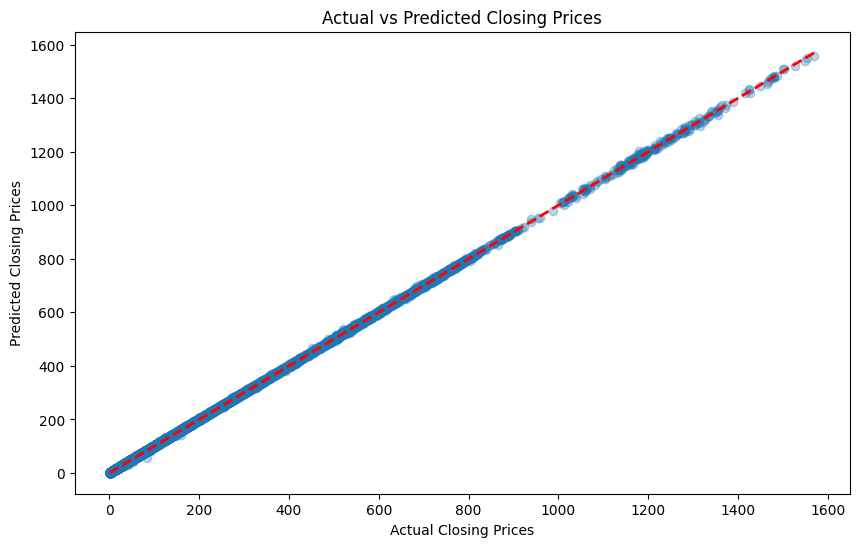

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for modeling
# We'll use the 'close' price as the target variable and the 'open', 'low', 'high', and 'volume' as features
features = ['open', 'low', 'high', 'volume']
target = 'close'

# Drop rows with missing values in the features or target
model_data = merged_df.dropna(subset=features + [target])

# Split the data into training and testing sets
X = model_data[features]
y = model_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs predicted closing prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs Predicted Closing Prices')
plt.show()